1. Distribuzione delle Etichette (Attacchi e Normale)

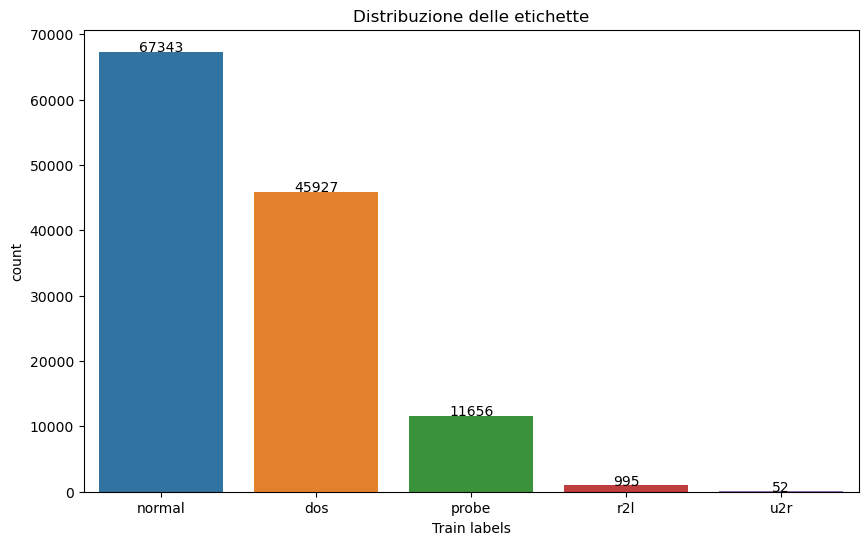

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

name = 'Train'
df = pd.read_csv(f'KDD{name}+.txt', header=None)

df.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
              'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
              'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
              'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
              'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
              'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
              'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
              'dst_host_srv_rerror_rate', 'label', 'score']

df['label'] = df['label'].replace({'normal': 'normal',
                                   
                                   'neptune': 'dos', 'back': 'dos', 'land': 'dos',
                                   'pod': 'dos', 'smurf': 'dos', 'teardrop': 'dos', 'mailbomb': 'dos',
                                   'apache2': 'dos', 'processtable': 'dos', 'udpstorm': 'dos', 'worm': 'dos',

                                   'ipsweep': 'probe', 'nmap': 'probe', 'portsweep': 'probe', 'satan': 'probe',
                                   'mscan': 'probe', 'saint': 'probe', 

                                   'ftp_write': 'r2l', 'guess_passwd': 'r2l','imap': 'r2l', 'multihop': 'r2l', 'phf': 'r2l', 'spy': 'r2l', 'warezclient': 'r2l',
                                   'warezmaster': 'r2l', 'sendmail': 'r2l', 'named': 'r2l', 'snmpgetattack': 'r2l',
                                   'snmpguess': 'r2l', 'xlock': 'r2l', 'xsnoop': 'r2l', 'httptunnel': 'r2l',

                                   'buffer_overflow': 'u2r', 'loadmodule': 'u2r', 'perl': 'u2r', 'rootkit': 'u2r',
                                   'ps': 'u2r', 'sqlattack': 'u2r', 'xterm': 'u2r'
                                   })

nominal_features = ['protocol_type', 'service', 'flag']
binary_features = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']
numeric_features = [feature for feature in df.columns if feature not in nominal_features + binary_features + ['label', 'score']]

plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, order = df['label'].value_counts().index)
plt.xlabel(f'{name} labels')
for i in range(len(df['label'].value_counts())):
    plt.text(i, df['label'].value_counts()[i], df['label'].value_counts()[i], ha = 'center')
plt.title('Distribuzione delle etichette')
plt.show()

2. Grafici a barre per le feature categoriche

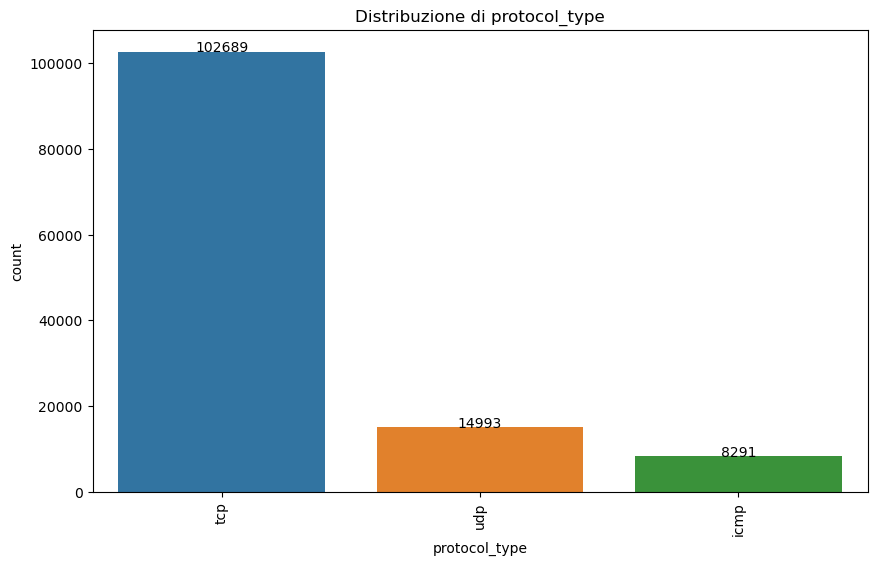

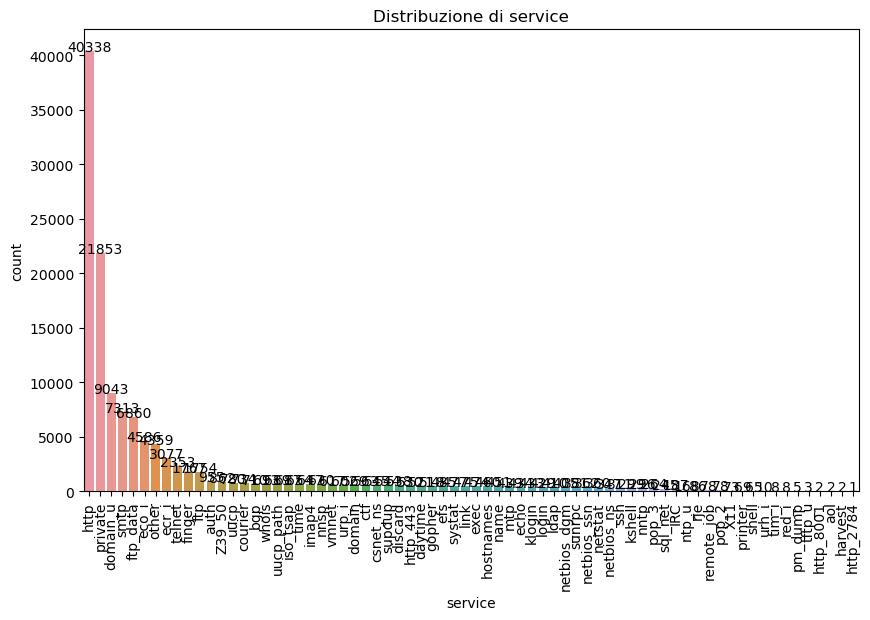

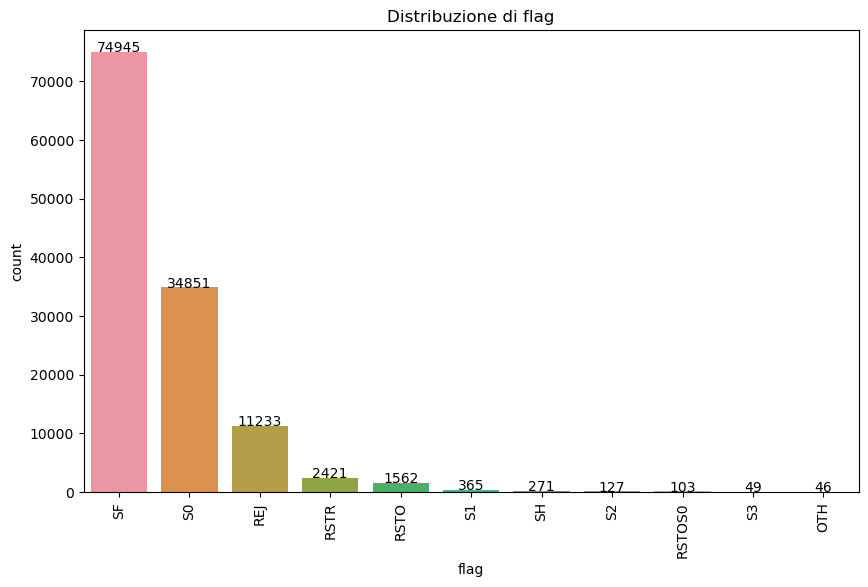

In [43]:
for feature in nominal_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df, order = df[feature].value_counts().index)
    plt.title(f'Distribuzione di {feature}')
    plt.xticks(rotation=90)
    for i in range(len(df[feature].value_counts())):
        plt.text(i, df[feature].value_counts()[i], df[feature].value_counts()[i], ha = 'center')
    plt.show()


3. Grafico a barre per le feature binarie

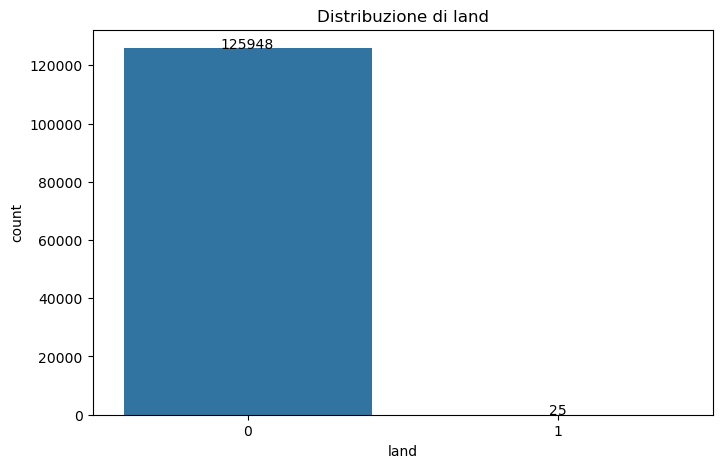

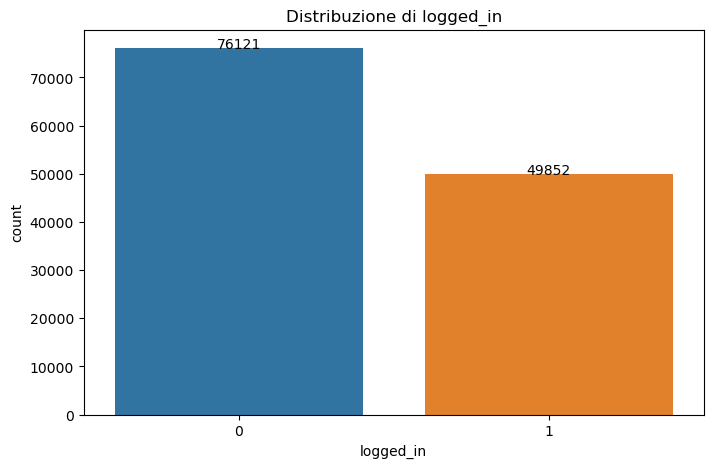

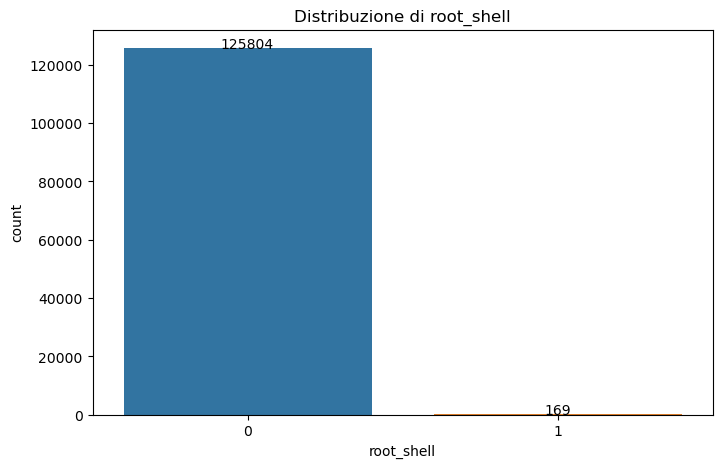

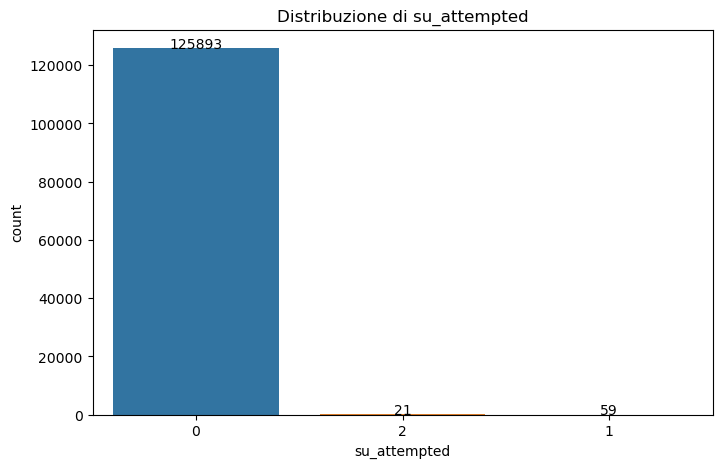

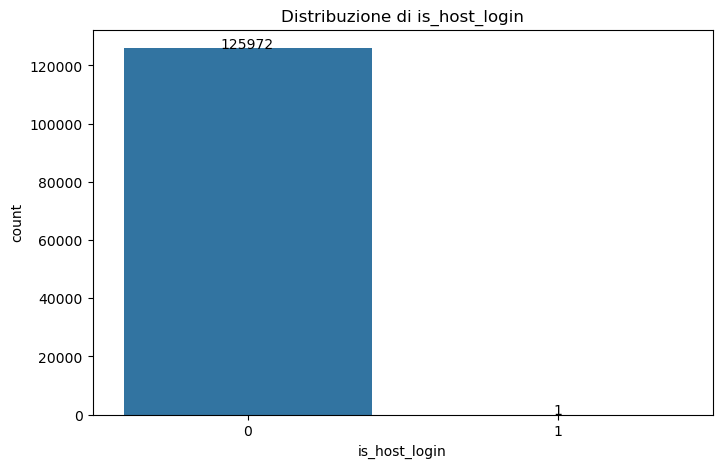

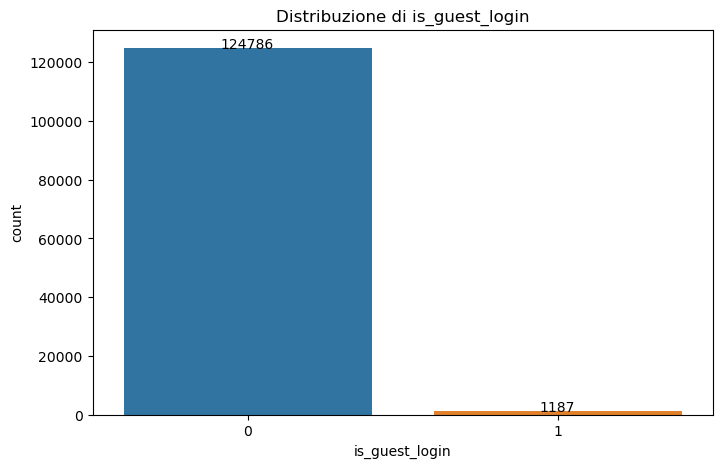

In [44]:
for feature in binary_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=df, order = df[feature].value_counts().index)
    plt.title(f'Distribuzione di {feature}')
    for i in range(len(df[feature].value_counts())):
        plt.text(i, df[feature].value_counts()[i], df[feature].value_counts()[i], ha = 'center')
    plt.show()


4. Istogrammi per le feature discrete

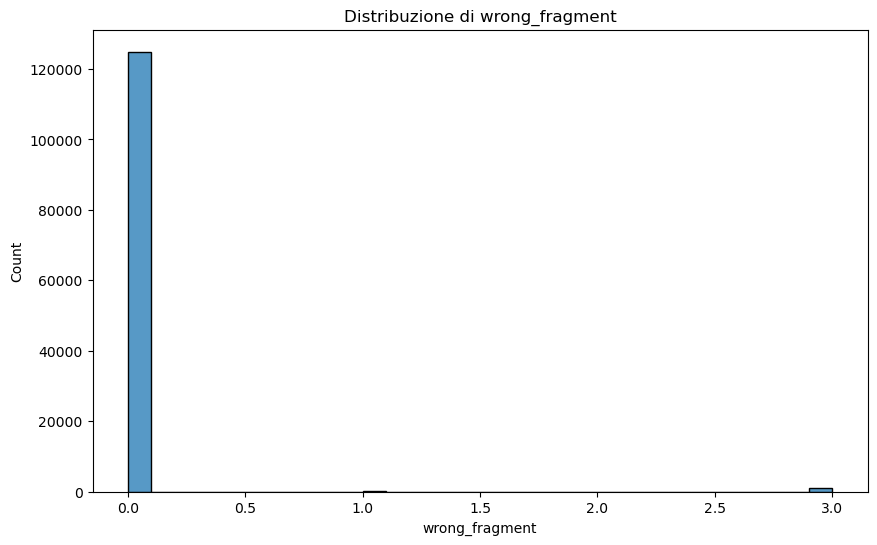

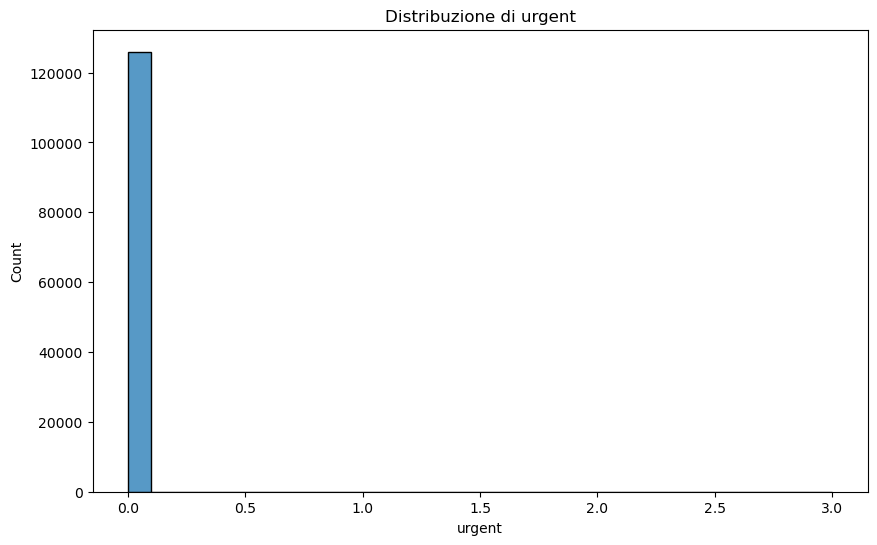

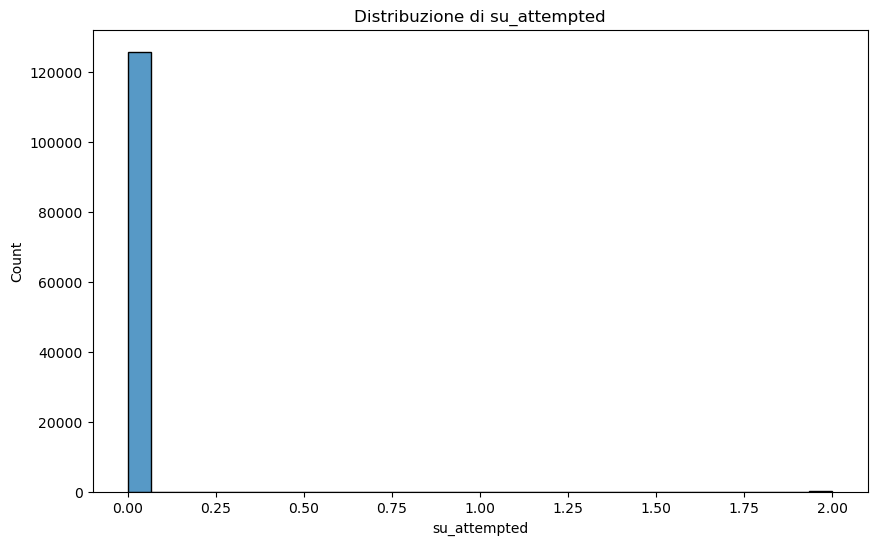

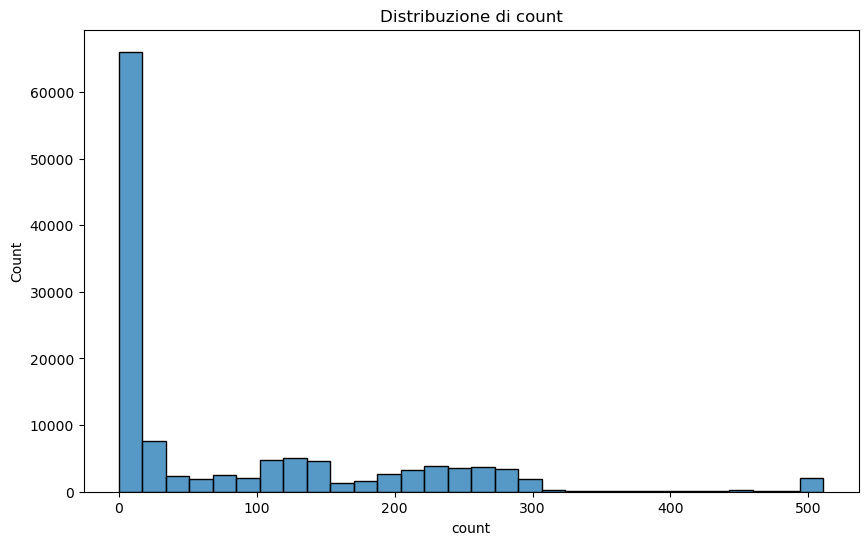

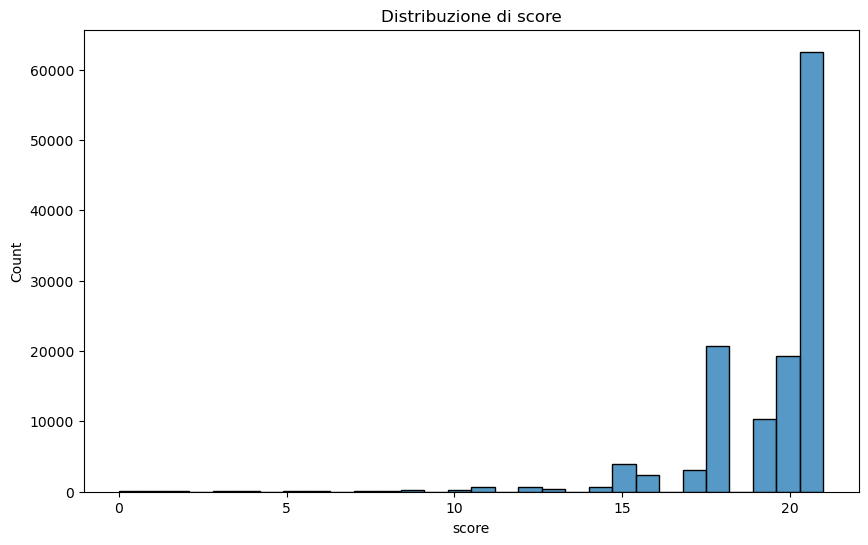

In [45]:
discrete_features = ['wrong_fragment', 'urgent', 'su_attempted', 'count', 'score']

for feature in discrete_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=False, bins=30)
    plt.title(f'Distribuzione di {feature}')
    plt.show()


5. Boxplot per le feature continue

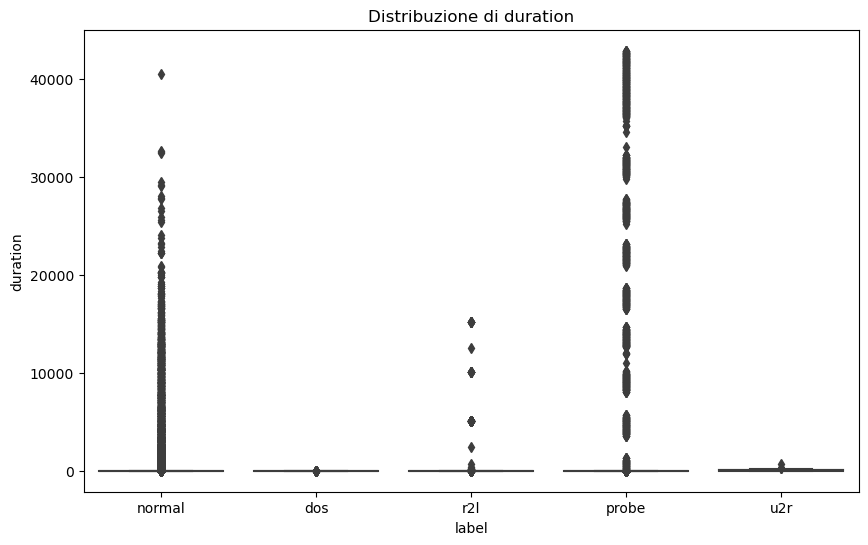

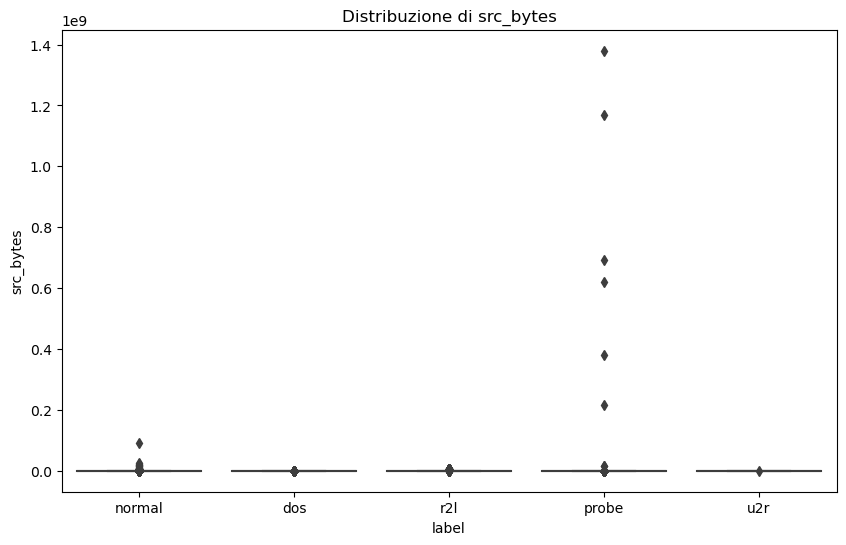

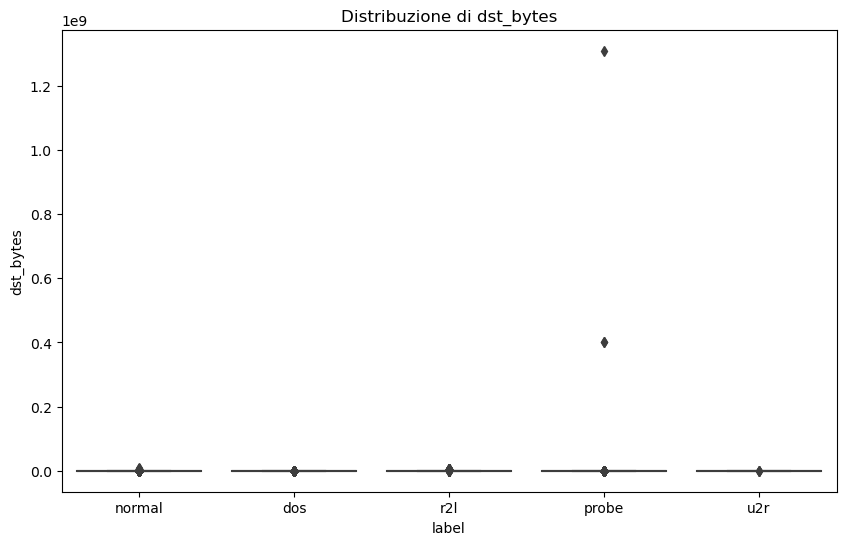

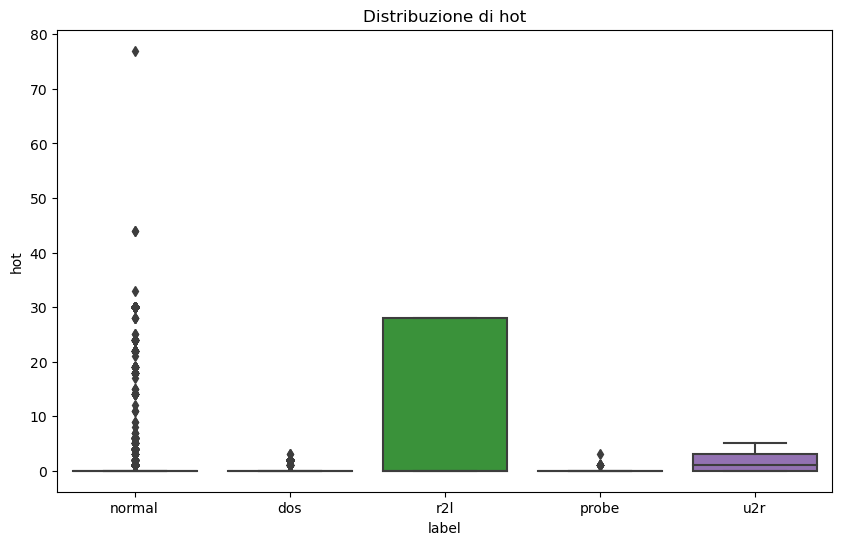

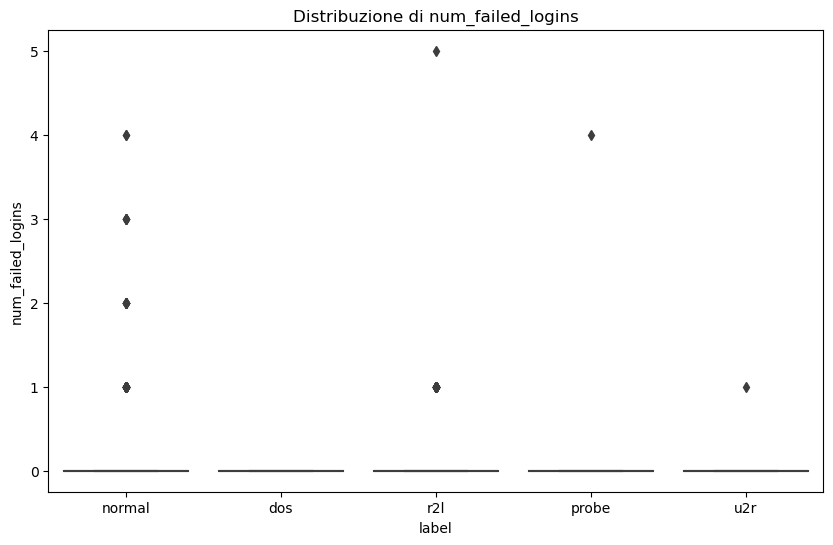

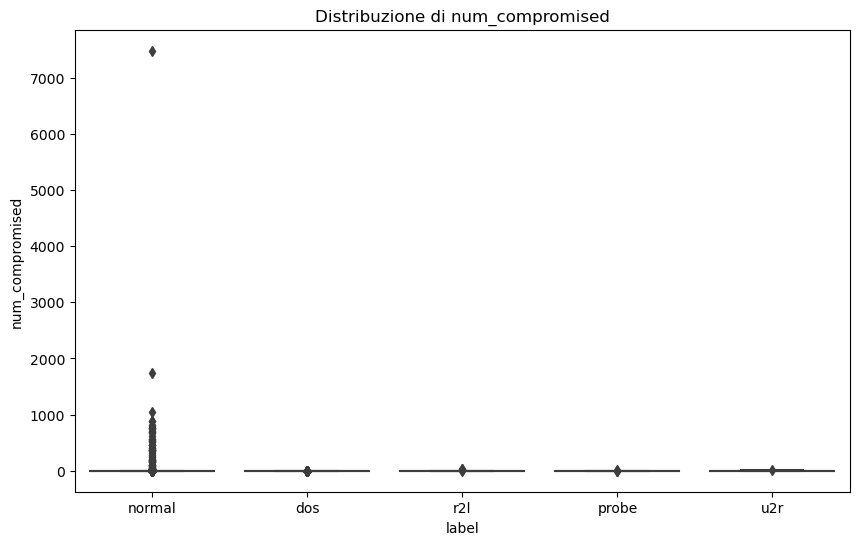

In [46]:
continuous_features = ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'num_compromised']

for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=feature, data=df)  # Per visualizzare la differenza tra attacchi e normale
    plt.title(f'Distribuzione di {feature}')
    plt.show()


6. Scatter plot per le feature continue

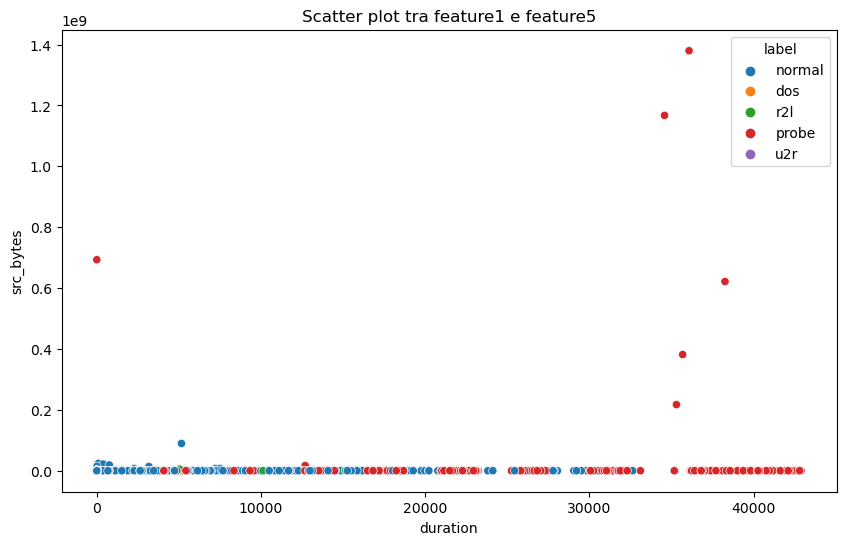

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='src_bytes', hue='label', data=df)
plt.title('Scatter plot tra feature1 e feature5')
plt.show()


7. Heatmap delle correlazioni

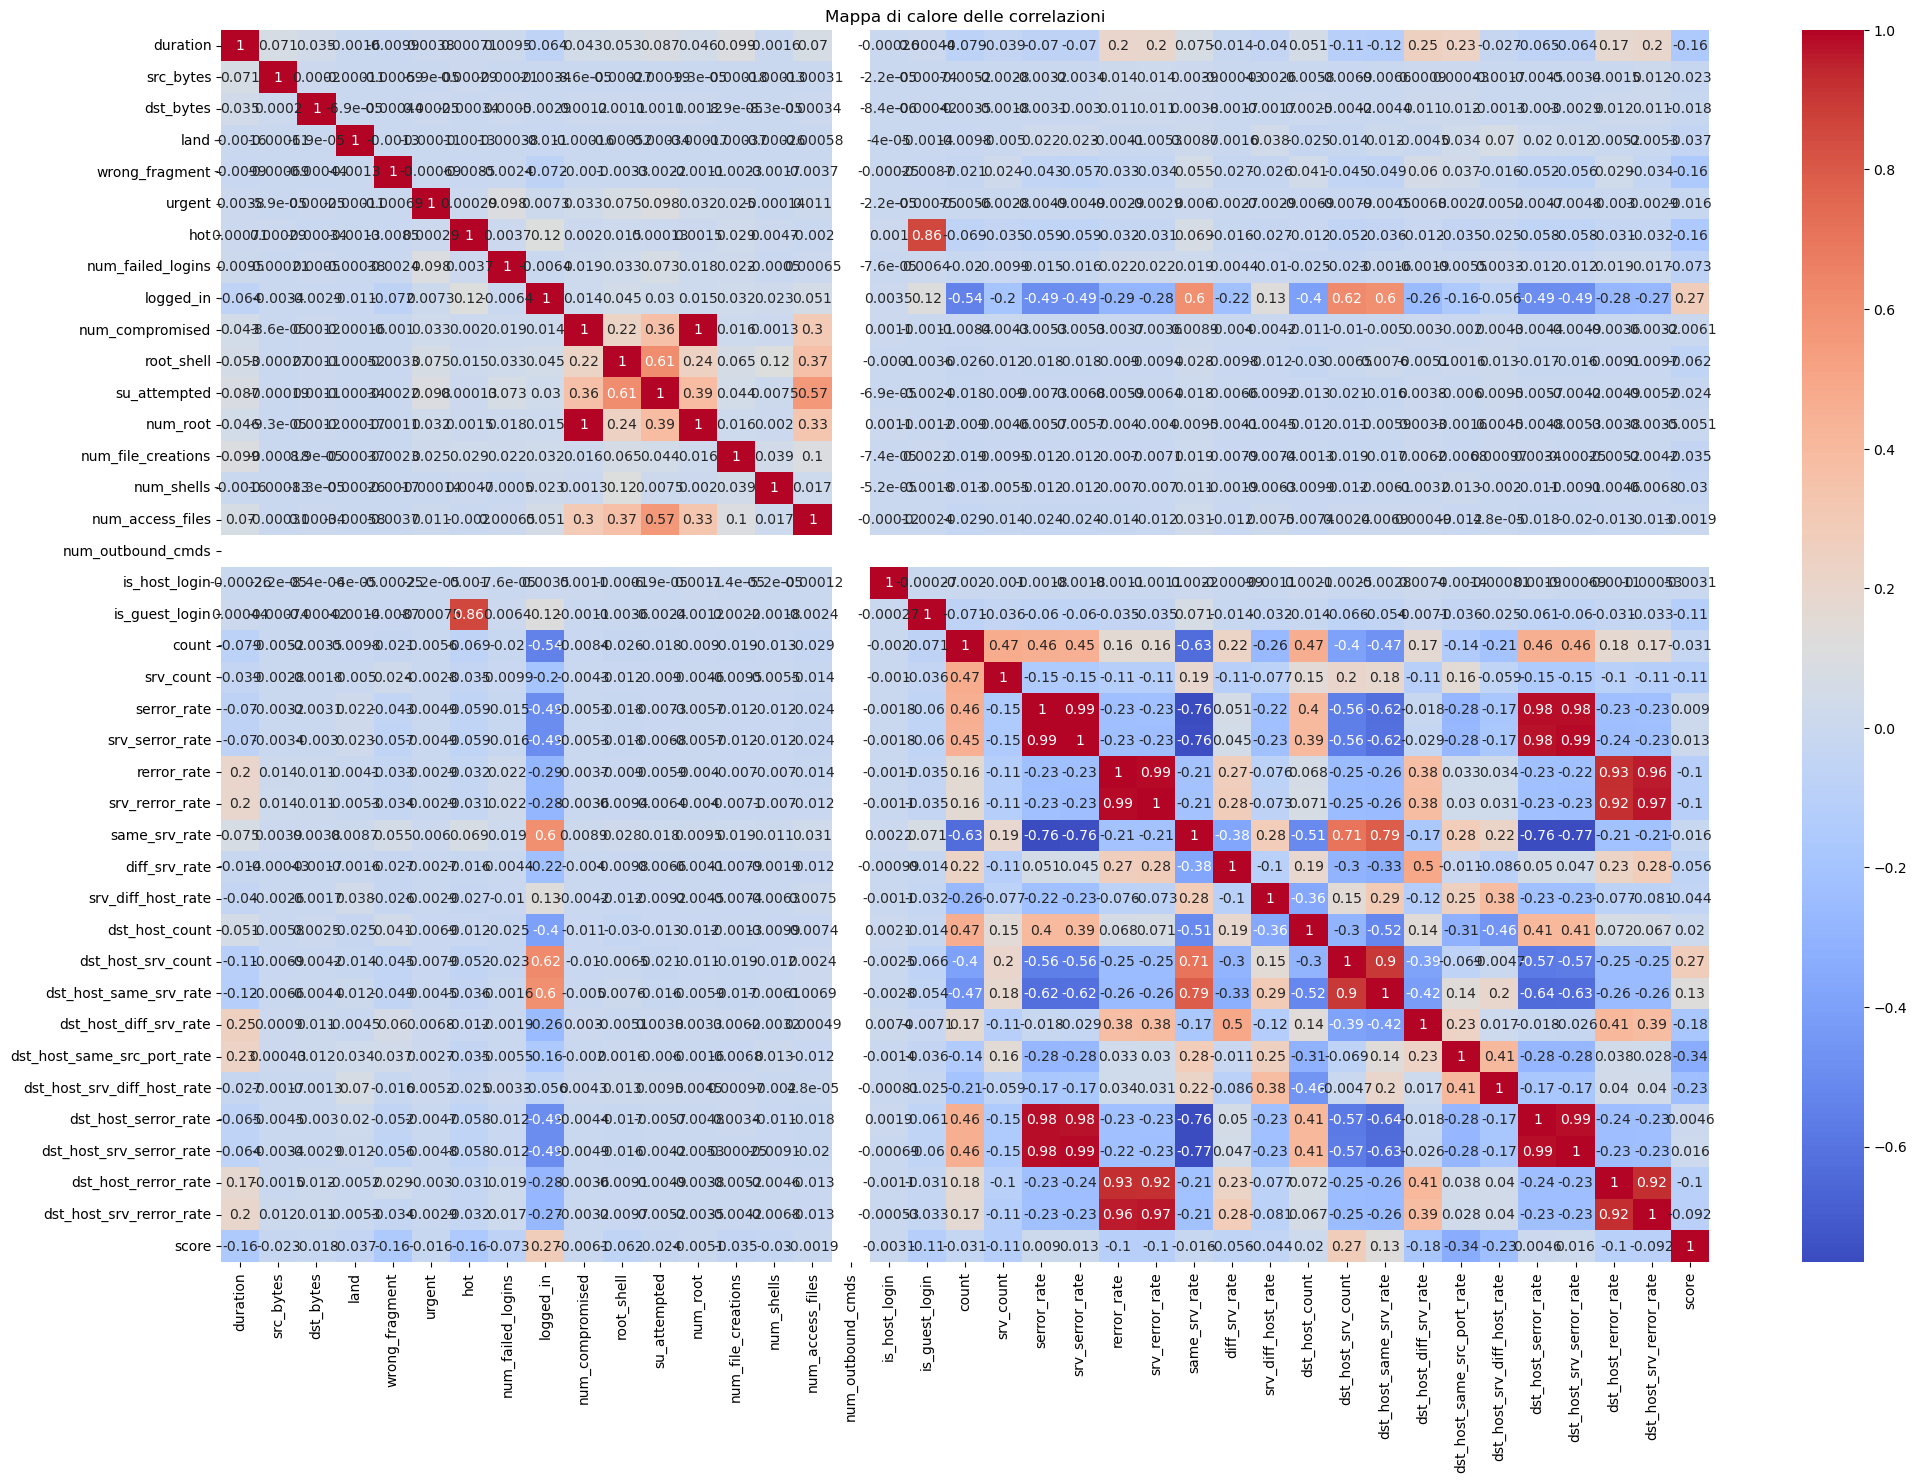

In [48]:
plt.figure(figsize=(24, 16))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Mappa di calore delle correlazioni')
plt.show()

8. Boxplot del punteggio di severità

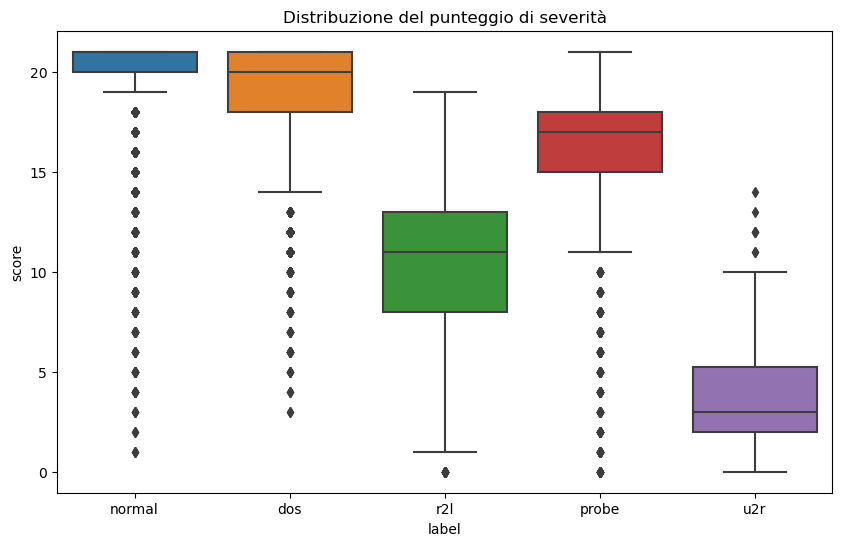

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='score', data=df)
plt.title('Distribuzione del punteggio di severità')
plt.show()


9. Line plot per le feature time-based

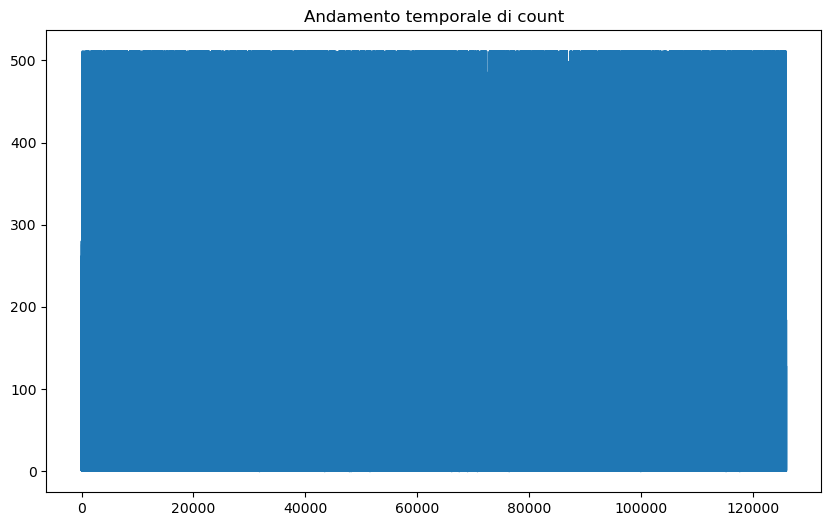

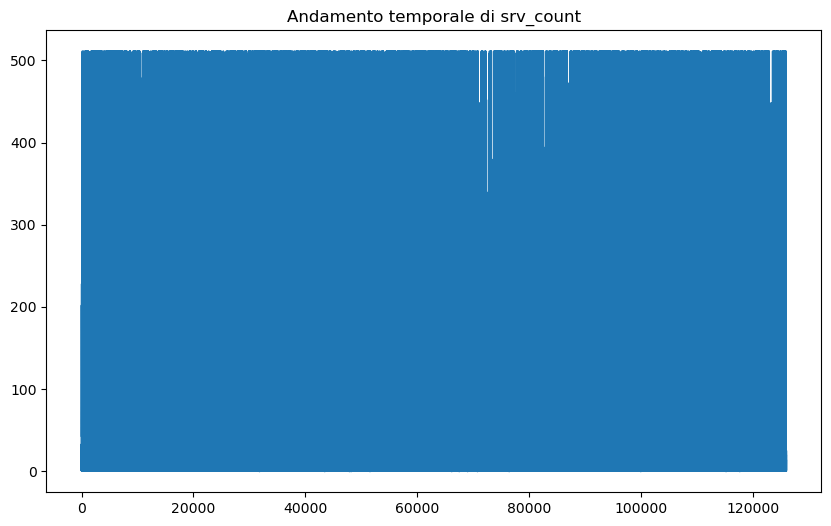

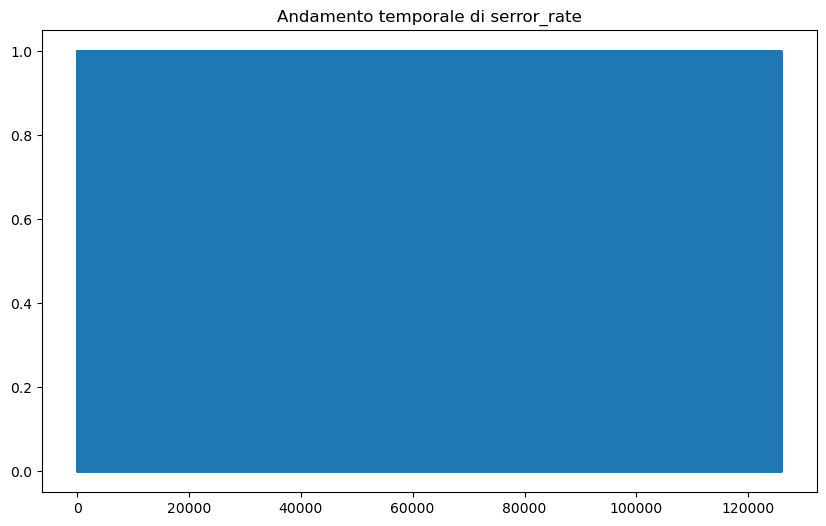

In [50]:
time_based_features = ['count', 'srv_count', 'serror_rate']

for feature in time_based_features:
    plt.figure(figsize=(10, 6))
    plt.plot(df[feature])
    plt.title(f'Andamento temporale di {feature}')
    plt.show()
